In [1]:
import os, sys
import shutil
import numpy as np
import matplotlib.pyplot as plt

Thermal_CNT_0_25_1.96.log.lammps
[0.0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01, 0.0105, 0.011, 0.0115, 0.012, 0.0125, 0.013, 0.0135, 0.014, 0.0145, 0.015, 0.0155, 0.016, 0.0165, 0.017, 0.0175, 0.018, 0.0185, 0.019, 0.0195, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225, 0.023, 0.0235, 0.024, 0.0245, 0.025, 0.0255, 0.026, 0.0265, 0.027, 0.0275, 0.028, 0.0285, 0.029, 0.0295, 0.03, 0.0305, 0.031, 0.0315, 0.032, 0.0325, 0.033, 0.0335, 0.034, 0.0345, 0.035, 0.0355, 0.036, 0.0365, 0.037, 0.0375, 0.038, 0.0385, 0.039, 0.0395, 0.04, 0.0405, 0.041, 0.0415, 0.042, 0.0425, 0.043, 0.0435, 0.044, 0.0445, 0.045, 0.0455, 0.046, 0.0465, 0.047, 0.0475, 0.048, 0.0485, 0.049, 0.0495, 0.05, 0.0505, 0.051, 0.0515, 0.052, 0.0525, 0.053, 0.0535, 0.054, 0.0545, 0.055, 0.0555, 0.056, 0.0565, 0.057, 0.0575, 0.058, 0.0585, 0.059, 0.0595, 0.06, 0.0605, 0.061, 0.0615, 0.062, 0.0625, 0.063, 0.0635, 0.064, 0.0645,

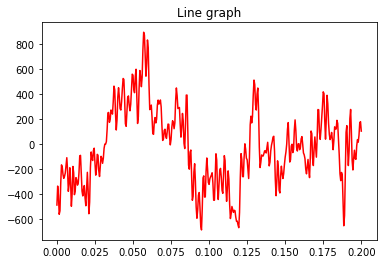

In [31]:
## Takes in files that has .lammps in their names. Limited to only the folder this scirpt is in.
all_the_log_files = [f for f in os.listdir() if f.endswith('.lammps') and not os.path.isdir(f)]

store_numpy_arrays = []

# for i, log_file in enumerate(all_the_log_files):
for i, log_file in enumerate(all_the_log_files):
    print(log_file)
    file_stem = log_file.replace('.log.lammps','')

    ## Get the text from the log file
    with open(log_file, 'r') as f:
        txt = f.readlines()

    col_check_str = '   Step          Temp       c_myFlux[1]  '
    end_check_str = 'Loop time of '
    columns = None
    start_idx, end_idx = 0, len(txt)
    
    ## If the code detects a particular line, begin reading the entire section below that until a certain point
    for line_idx, line in enumerate(txt):
        if col_check_str in line:
            columns = line.strip().split()
            start_idx = line_idx + 1
        if end_check_str in line and columns:
            end_idx = line_idx - 1
    
    
    data0 = txt[start_idx:end_idx + 1]
    data = [row for row in data0 if len(row.split()) == 3] ## Should the log.lammps be cut off early, remove cut off row
    columns_entry = None
    
    ## PRINT DEBUG
#     print(columns)
#     print(start_idx,end_idx)
#     print(data0[-1:])

    ## write the CSV file
    csv_name = f'{file_stem}.csv'
    with open(csv_name, 'w') as f:
        f.write(",".join(columns) + "\n")
        for start_idx in data:
            ## Check if the rows has all the columns. If it is missing all 14 columns, remove the entire row.
            ## Suggested by Drew Rohskopf
            columns_entry = start_idx.strip().split()
            line_length = len(columns_entry)
            if (line_length==3):
                f.write(",".join(columns_entry) + "\n")
                
    ## Create an array to store each elements in a column
    arr = np.array([[float(element) for element in row.split()] for row in data])
    store_numpy_arrays.append(arr)

    copy_arr = arr.copy()
    col_flux = copy_arr[:,2]
    
    ## Array for timestep converted to picosecond
    ps_arr = [] 
    snapshots = 0
    
    ## PRINT DEBUG
    #print(col_flux)
    #print(col_step)
    
    ## Calculate timesteps into picoseconds
    for counter in data:
        picoseconds = 0.0005 * snapshots
        ps = round(picoseconds,8)
        ps_arr.append(ps)
        #print(ps)
        snapshots = snapshots + 1
    
    print(ps_arr)
    
    ## 1 row, 2 column of graphs for temperature for subplots
#     fig, axes = plt.subplots(1, 2, figsize = [15,4])
    
#     axes[0].plot(ps_arr, col_flux,label="temperature",c="r")
#     axes[0].set_title('Heat Flux vs Time')
#     axes[0].set_xlabel('MD Time (ps)')
#     axes[0].set_ylabel('Heat Flux')
#     axes[0].yaxis.get_ticklocs(minor=True)
#     axes[0].minorticks_on()

    plt.title("Line graph")
    plt.plot(ps_arr, col_flux, color="red")
